In [111]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

In [112]:
data = pd.read_excel ("Dati_Scania.xlsx")
data.shape

(26085, 66)

In [113]:
data = data.drop_duplicates().reset_index().drop(columns=['index'])
data

,AnticipationScaniaDriverSupport,AverageFuelConsumption,AverageFuelDriveAndIdleCompareSign,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkCompareSign,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLCompareSign,...,TotalDistanceWithPerformanceModeStandard,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TotalGasIdle,TotalGasPto,TotalGasUsed,TransportWork,UseOfBrakesScaniaDriverSupport,Vin
0,33.0,43.7,≤,43.7,11.9,≥,65.0,27.0,448,≤,...,0,60,1,17,0.0,0.0,0.0,2695.0,43.0,YS2P6X20009242741
1,48.0,47.6,≤,47.6,21.3,≥,52.0,24.0,551,≤,...,0,48,1,3,0.0,0.0,0.0,2240.0,NaN,YS2P6X20009243357
2,51.0,28.9,≤,28.9,23.3,≥,67.0,18.0,328,≤,...,0,40,1,8,0.0,0.0,0.0,2021.0,NaN,YS2P6X20009243797
3,NaN,32.7,≤,32.7,14.9,≥,51.0,15.0,831,≤,...,0,54,3,11,NaN,NaN,NaN,1997.0,NaN,YS2P4X20009247867
4,0.0,33.0,≤,33.0,12.1,≥,47.0,15.0,676,≤,...,0,35,1,10,NaN,NaN,NaN,1160.0,NaN,YS2P4X20009247986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,NaN,30.4,≤,30.4,11.7,≥,51.0,14.0,776,≤,...,0,56,3,18,NaN,NaN,NaN,1788.0,NaN,YS2P4X20009248881
2031,48.0,44.5,≤,44.5,9.5,≥,40.0,16.0,213,≤,...,0,19,1,5,0.0,0.0,0.0,508.0,NaN,YS2P6X20009243797
2032,58.0,39.3,≤,39.3,17.3,≥,55.0,21.0,790,≤,...,0,49,2,5,0.0,0.0,0.0,2268.0,NaN,YS2P6X20009243357
2033,NaN,29.8,≤,29.8,21.2,≥,48.0,14.0,1143,≤,...,0,69,3,8,NaN,NaN,NaN,2811.0,NaN,YS2P4X20009248875


In [114]:
col_to_delete = []

for c in data.columns:
    if (data[c].isna().sum() > 1000):
        col_to_delete.append(c)
        print(c, data[c].isna().sum() )
        print()


ChoiceOfGearScaniaDriverSupport 1955

DistanceWithTrailer 1330

DrivingOutsideOptimumEngineSpeedValue 1521

HillDrivingScaniaDriverSupport 1316

MaxEngineSpeed 1656

MaxVehicleSpeed 1656

TotalGasIdle 1519

TotalGasPto 1519

TotalGasUsed 1519

UseOfBrakesScaniaDriverSupport 1698



In [115]:
data = data.drop(col_to_delete, axis=1)
print(data.shape)

(2035, 56)


In [116]:
col_to_delete = []

for c in data.columns:
    if (len(data[c].value_counts()) == 1):
        col_to_delete.append(c)

col_to_delete

['AverageFuelDriveAndIdleCompareSign',
 'AverageTransportWorkCompareSign',
 'BrakeApplicationsTLCompareSign',
 'CoastingCompareSign',
 'CoastingInNeutral',
 'DrivingOutsideOptimumEngineSpeedCompareSign',
 'DrivingWithVehicleWarningCompareSign',
 'EngineOverSpeedCompareSign',
 'EngineRuntimePause',
 'HarshAccelerationsCompareSign',
 'HarshBrakeApplicationsTLCompareSign',
 'IdlingCompareSign',
 'PerformanceModeOffRoadPercentage',
 'ScaniaDriverSupportCompareSign',
 'SpeedingCompareSign',
 'TotalDistanceWithPerformanceModeOffRoad']

In [117]:
data = data.drop(col_to_delete, axis=1)
data.shape

(2035, 40)

In [118]:
list(data.columns)

['AnticipationScaniaDriverSupport',
 'AverageFuelConsumption',
 'AverageFuelDriveAndIdleValue',
 'AverageSpeed',
 'AverageTransportWorkValue',
 'AverageWeight',
 'BrakeApplications',
 'BrakeApplicationsTLValue',
 'ChassisNumber',
 'CoastingValue',
 'CustomerVehicleName',
 'Distance',
 'DistanceWithCruiseControl',
 'DrivingWithVehicleWarningValue',
 'EngineOverSpeedValue',
 'EngineRunningTime',
 'EngineRuntimeIdle',
 'EngineRuntimePto',
 'FuelConsumptionPerHour',
 'HarshAccelerationsValue',
 'HarshBrakeApplications',
 'HarshBrakeApplicationsTLValue',
 'IdlingValue',
 'LicensePlate',
 'Odometer',
 'PerformanceModeEconomyPercentage',
 'PerformanceModePowerPercentage',
 'PerformanceModeStandardPercentage',
 'ScaniaDriverSupportValue',
 'SpeedingValue',
 'StartDate',
 'StopDate',
 'TotalDistanceWithPerformanceModeEconomy',
 'TotalDistanceWithPerformanceModePower',
 'TotalDistanceWithPerformanceModeStandard',
 'TotalFuelConsumption',
 'TotalFuelConsumptionIdling',
 'TotalFuelConsumptionPto',

In [119]:
data

,AnticipationScaniaDriverSupport,AverageFuelConsumption,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLValue,ChassisNumber,CoastingValue,...,StartDate,StopDate,TotalDistanceWithPerformanceModeEconomy,TotalDistanceWithPerformanceModePower,TotalDistanceWithPerformanceModeStandard,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TransportWork,Vin
0,33.0,43.7,43.7,11.9,65.0,27.0,448,455.6,9242741,5.6,...,2021-07-23 04:30,2021-07-24 04:09,0,98,0,60,1,17,2695.0,YS2P6X20009242741
1,48.0,47.6,47.6,21.3,52.0,24.0,551,591.3,9243357,16.4,...,2021-07-23 03:45,2021-07-23 23:05,0,93,0,48,1,3,2240.0,YS2P6X20009243357
2,51.0,28.9,28.9,23.3,67.0,18.0,328,299.8,9243797,2.8,...,2021-07-23 03:46,2021-07-24 06:51,109,0,0,40,1,8,2021.0,YS2P6X20009243797
3,NaN,32.7,32.7,14.9,51.0,15.0,831,635.9,9247867,3.0,...,2021-07-23 03:30,2021-07-24 05:03,0,131,0,54,3,11,1997.0,YS2P4X20009247867
4,0.0,33.0,33.0,12.1,47.0,15.0,676,873.3,9247986,1.3,...,2021-07-23 05:18,2021-07-24 05:16,77,0,0,35,1,10,1160.0,YS2P4X20009247986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,NaN,30.4,30.4,11.7,51.0,14.0,776,620.4,9248881,4.2,...,2021-06-28 02:52,2021-06-28 16:46,125,0,0,56,3,18,1788.0,YS2P4X20009248881
2031,48.0,44.5,44.5,9.5,40.0,16.0,213,676.2,9243797,11.3,...,2021-09-10 05:52,2021-09-10 16:32,0,32,0,19,1,5,508.0,YS2P6X20009243797
2032,58.0,39.3,39.3,17.3,55.0,21.0,790,716.1,9243357,14.1,...,2021-09-02 04:50,2021-09-02 13:12,110,0,0,49,2,5,2268.0,YS2P6X20009243357
2033,NaN,29.8,29.8,21.2,48.0,14.0,1143,559.5,9248875,4.2,...,2021-09-02 04:51,2021-09-02 17:58,204,0,0,69,3,8,2811.0,YS2P4X20009248875


In [120]:
data = data.sort_values(["LicensePlate", "StartDate"]).reset_index().drop(columns=['index'])
data

,AnticipationScaniaDriverSupport,AverageFuelConsumption,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLValue,ChassisNumber,CoastingValue,...,StartDate,StopDate,TotalDistanceWithPerformanceModeEconomy,TotalDistanceWithPerformanceModePower,TotalDistanceWithPerformanceModeStandard,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TransportWork,Vin
0,23.0,35.9,35.9,26.2,67.0,23.0,484,257.4,9242741,5.6,...,2021-05-25 03:50,2021-05-26 04:10,188,0,0,74,3,6,4329.0,YS2P6X20009242741
1,44.0,38.6,38.6,22.8,69.0,26.0,869,378.4,9242741,5.1,...,2021-05-26 04:10,2021-05-27 03:13,230,0,0,99,3,10,5905.0,YS2P6X20009242741
2,44.0,38.6,38.6,22.8,69.0,26.0,869,378.4,9242741,5.1,...,2021-05-26 04:10,2021-05-26 16:58,230,0,0,99,3,10,5905.0,YS2P6X20009242741
3,33.0,40.6,40.6,24.9,67.0,27.0,1067,345.8,9242741,4.2,...,2021-05-27 03:13,2021-05-28 02:59,275,34,0,139,3,14,8203.0,YS2P6X20009242741
4,33.0,41.4,41.4,24.1,65.0,26.0,950,347.1,9242741,4.1,...,2021-05-27 03:13,2021-05-27 14:41,240,34,0,127,2,14,7223.0,YS2P6X20009242741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,NaN,30.8,30.8,13.5,52.0,15.0,800,577.4,9248881,3.6,...,2021-09-17 05:53,2021-09-17 17:00,138,0,0,56,3,14,2069.0,YS2P4X20009248881
2031,NaN,31.9,31.9,11.1,50.0,15.0,747,572.0,9248881,4.7,...,2021-09-20 05:50,2021-09-21 05:21,131,0,0,59,4,18,1909.0,YS2P4X20009248881
2032,NaN,31.9,31.9,11.1,50.0,15.0,747,572.0,9248881,4.7,...,2021-09-20 05:50,2021-09-20 18:57,131,0,0,59,4,18,1909.0,YS2P4X20009248881
2033,NaN,30.6,30.6,11.4,50.0,14.0,672,603.3,9248881,3.6,...,2021-09-21 05:21,2021-09-22 05:49,111,0,0,49,2,15,1577.0,YS2P4X20009248881


In [121]:
data['LicensePlate'].value_counts()

FV914SK    210
FV904SK    197
FY297YC    189
FV059FV    185
FV060FV    182
FV906SK    179
FV913SK    162
FV903SK    158
FV908SK    149
FZ330SC    149
FW934DT    149
FV907SK    126
Name: LicensePlate, dtype: int64

In [122]:
data['StopDate'] = pd.to_datetime(data['StopDate'])
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['tot_time'] = data['StopDate'] - data['StartDate']
data['tot_time'] = data['tot_time'].apply(lambda x: int(x.total_seconds()/3600))

In [123]:
data['tot_time'].value_counts()

24    364
23    303
7     160
12    144
8     144
11    136
10    107
6      91
13     76
9      75
25     52
14     45
22     43
15     34
0      33
5      24
3      19
16     19
26     18
21     18
4      15
2      14
17     13
28     12
20     11
27     11
29     11
18     10
19      9
1       7
30      6
31      3
32      2
36      2
39      1
33      1
34      1
40      1
Name: tot_time, dtype: int64

In [124]:
data_truck_1 = data[data['LicensePlate'] == 'FV059FV'].copy()
data_truck_1[['StartDate', 'StopDate']]

,StartDate,StopDate
0,2021-05-25 03:50:00,2021-05-26 04:10:00
1,2021-05-26 04:10:00,2021-05-27 03:13:00
2,2021-05-26 04:10:00,2021-05-26 16:58:00
3,2021-05-27 03:13:00,2021-05-28 02:59:00
4,2021-05-27 03:13:00,2021-05-27 14:41:00
...,...,...
180,2021-09-18 03:48:00,2021-09-18 13:41:00
181,2021-09-20 04:00:00,2021-09-21 04:11:00
182,2021-09-20 04:00:00,2021-09-20 12:31:00
183,2021-09-21 04:11:00,2021-09-22 04:28:00


In [ ]:
### ANALISI TEMPORALE DEL DATASET

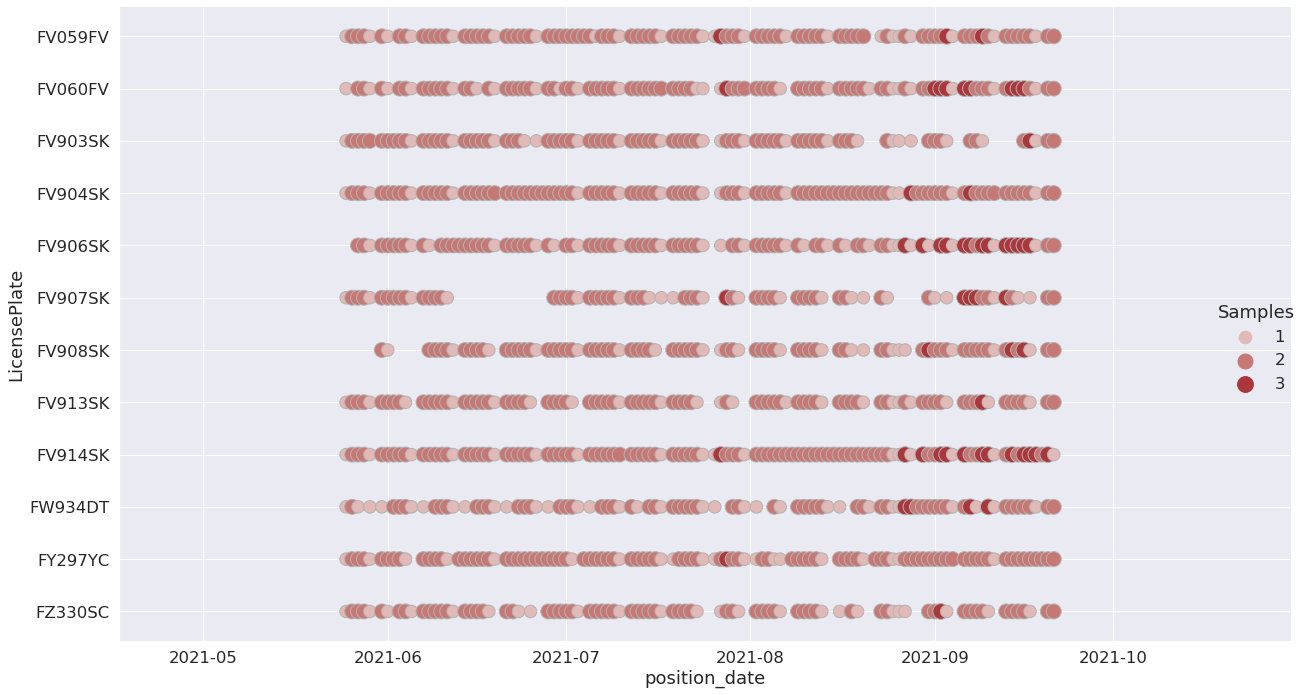

In [136]:
data["position_date"] = data.StartDate.dt.date
tmp = data.groupby(["LicensePlate", "position_date"], as_index=False).StartDate.count()
tmp['c'] = tmp.StartDate / tmp.StartDate.max()

g = sns.relplot(
    data=tmp,
    x="position_date", y="LicensePlate", hue="c", size="c",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8), aspect=1.5
)

for t in g._legend.get_texts():
    t.set_text(int(float(t.get_text())*tmp.StartDate.max()))
g._legend.set_title("Samples")
plt.tight_layout()
plt.savefig("Tempo.png")

In [ ]:
### RIPETO LA STESSA ANALISI MA CONSIDERANDO VALORI DISTIN
data["position_date"] = data.StartDate.dt.date
tmp = data.groupby(["LicensePlate", "position_date"], as_index=False).StartDate.count()
tmp['c'] = tmp.StartDate / tmp.StartDate.max()

g = sns.relplot(
    data=tmp,
    x="position_date", y="LicensePlate", hue="c", size="c",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8), aspect=1.5
)

for t in g._legend.get_texts():
    t.set_text(int(float(t.get_text())*tmp.StartDate.max()))
g._legend.set_title("Samples")
plt.tight_layout()
plt.savefig("Tempo.png")

In [ ]:
### MATRICE DI CORRELAZIONE

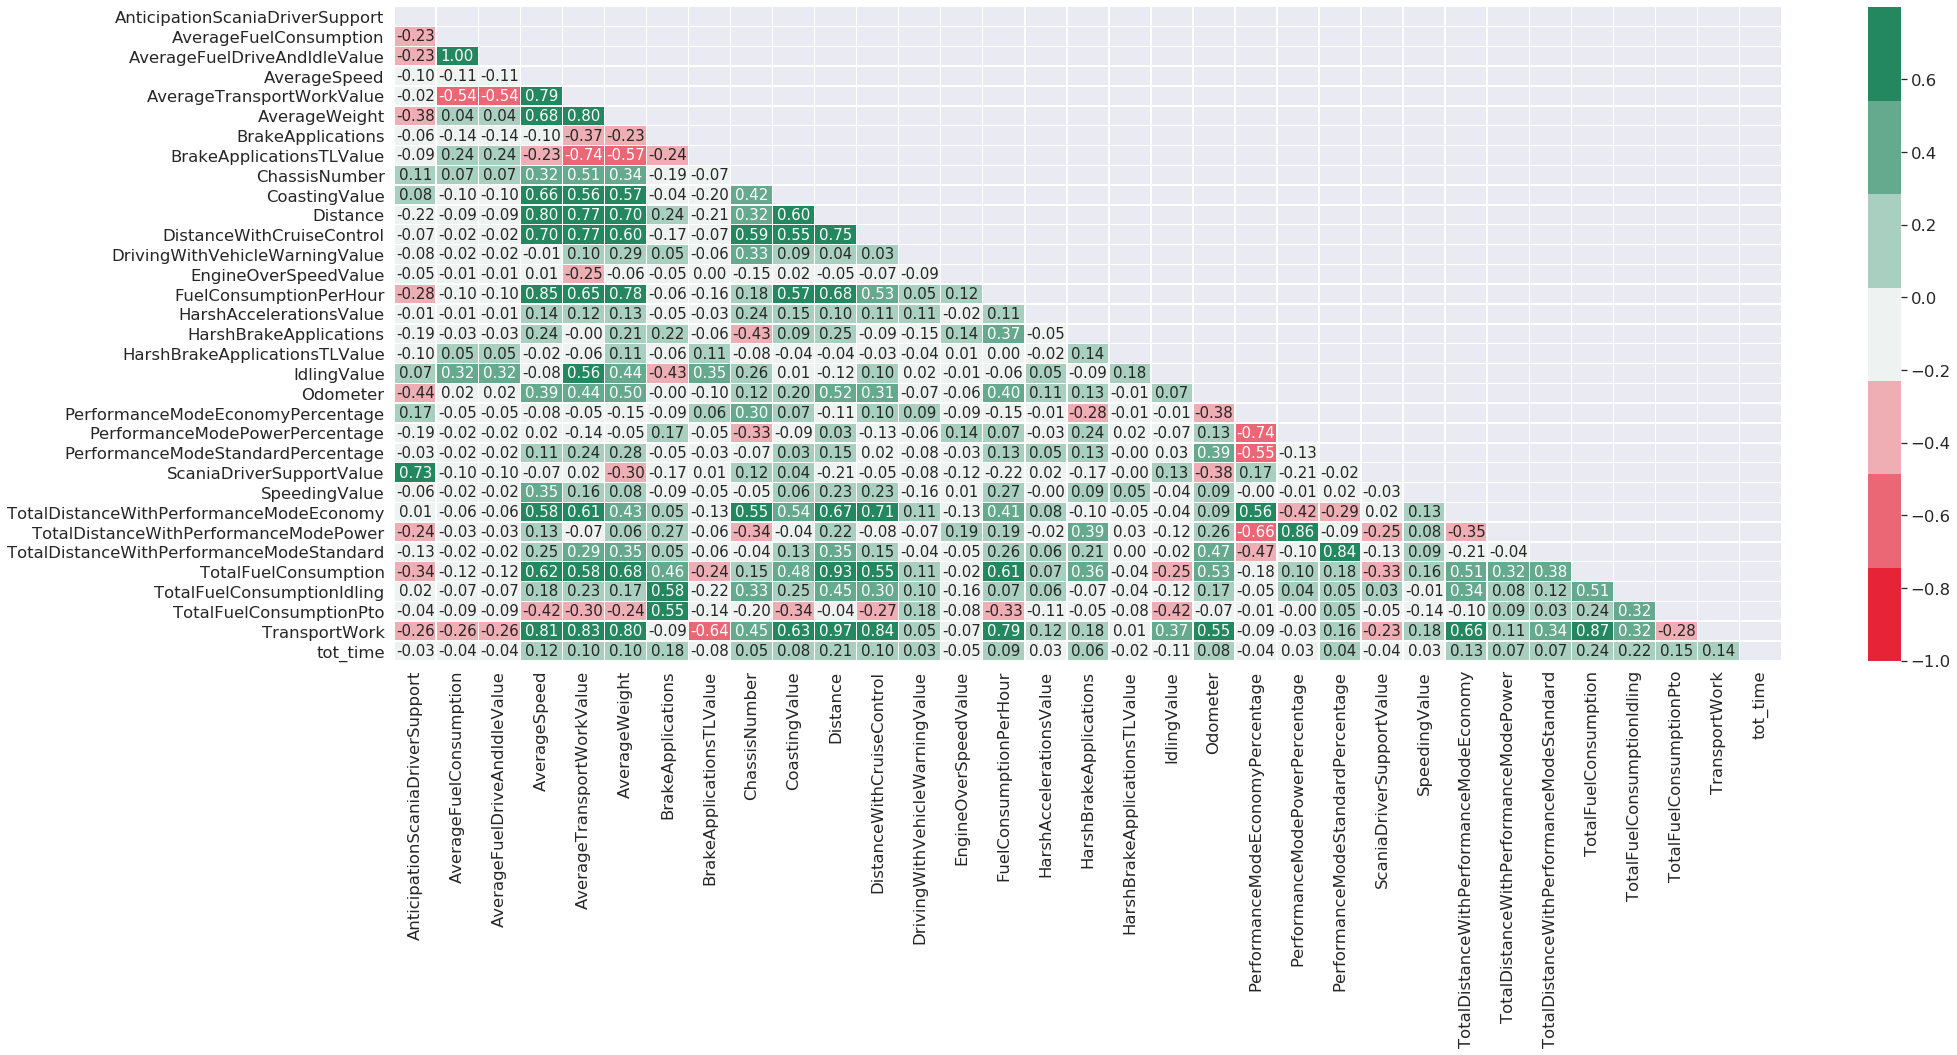

In [135]:
correlations = data.corr()

fig, ax = plt.subplots(figsize=(30,15))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlations, annot=True, fmt='.2f', linewidths=0.5,
            mask=mask, ax=ax, cmap=sns.diverging_palette(10, 150, s=90, n=7),
            robust=True, vmin=-1, annot_kws={"size": 15})
plt.tight_layout()
fig.savefig("corr.png")

In [ ]:
### PCA ANALYSIS
# - standardizzazione del dataset
# - plot delle principal component
# - estrazione feature più significative per ogni component

In [128]:
from sklearn.preprocessing import StandardScaler
data_std = data[['AverageFuelConsumption', 'AverageFuelDriveAndIdleValue', 'AverageSpeed', 'AverageTransportWorkValue', 'AverageWeight',
       'BrakeApplications', 'BrakeApplicationsTLValue',
       'CoastingValue', 'Distance',
       'DistanceWithCruiseControl', 'EngineOverSpeedValue',
       'FuelConsumptionPerHour', 'HarshAccelerationsValue',
       'HarshBrakeApplications', 'HarshBrakeApplicationsTLValue',
       'IdlingValue', 'Odometer',
       'PerformanceModeEconomyPercentage',
       'PerformanceModePowerPercentage', 'PerformanceModeStandardPercentage', 'TotalDistanceWithPerformanceModeEconomy',
       'TotalDistanceWithPerformanceModePower',
       'TotalDistanceWithPerformanceModeStandard', 'TotalFuelConsumption',
       'TotalFuelConsumptionIdling', 'TotalFuelConsumptionPto',
       'TransportWork']].copy()
data_std[data_std.columns] = StandardScaler().fit_transform(data_std[data_std.columns])

In [129]:
from sklearn.decomposition import PCA
#data_std = data_std.fillna(-100)
data_std = data_std.dropna()
pca = PCA(n_components=10)
pca.fit(data_std)
projection = pca.transform(data_std)

In [130]:
pca.explained_variance_ratio_

array([0.36576668, 0.17679359, 0.10599427, 0.08880458, 0.0574045 ,
       0.04735888, 0.03486621, 0.02575389, 0.02155855, 0.02082104])

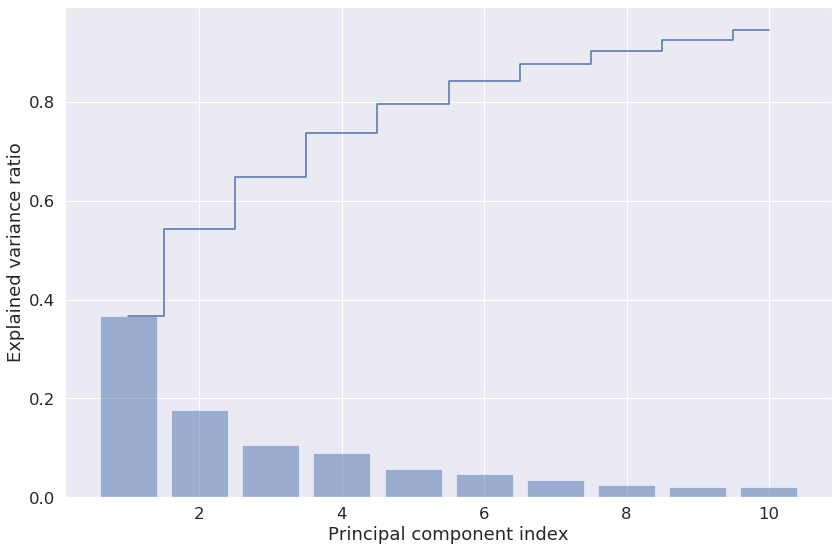

In [131]:
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 8))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
#plt.legend(loc='best')
plt.tight_layout()
plt.savefig("PCA_10")
plt.show()

In [132]:
most_important = [np.argpartition(np.abs(pca.components_[i]), -3)[-3:] for i in range(10)]

In [133]:
initial_feature_names = data_std.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(10)]

In [134]:
most_important_names

[Index(['AverageTransportWorkValue', 'Distance', 'TransportWork'], dtype='object'),
 Index(['PerformanceModePowerPercentage',
        'TotalDistanceWithPerformanceModePower',
        'PerformanceModeEconomyPercentage'],
       dtype='object'),
 Index(['TotalDistanceWithPerformanceModePower',
        'TotalDistanceWithPerformanceModeStandard',
        'PerformanceModeStandardPercentage'],
       dtype='object'),
 Index(['TotalFuelConsumptionIdling', 'TotalFuelConsumptionPto',
        'BrakeApplications'],
       dtype='object'),
 Index(['PerformanceModePowerPercentage', 'HarshAccelerationsValue',
        'HarshBrakeApplications'],
       dtype='object'),
 Index(['BrakeApplications', 'HarshAccelerationsValue',
        'HarshBrakeApplications'],
       dtype='object'),
 Index(['CoastingValue', 'TotalFuelConsumptionIdling', 'Odometer'], dtype='object'),
 Index(['AverageWeight', 'TotalFuelConsumptionPto', 'Odometer'], dtype='object'),
 Index(['EngineOverSpeedValue', 'CoastingValue', 'HarshB